## Lab-1.1: Multi-variable regression

* In this lab we generalize the lab from last week to the case of general multi-variable regression.
* Your solution should be fully general
  * This means it should work for arbitrary input matrix
  * And should be able to fit a model with an arbitrary number of fitting parameters

**Instructions**

* Read and work through all tutorial content and do all exercises below
  
**Submission:**

* You need to upload TWO documents to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook
  * (2) The .ipynb version of the completed form of this notebook
  * Failure to submit BOTH versions will result in a 10% deduction per missing document.
* The final uploaded version should NOT have any code-errors present
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

### Import packages

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from   scipy.optimize import minimize
import pandas as pd
import seaborn as sns

In [2]:
# INSERT CODE TO EVALUATE THE SIGMOID (LOGISTIC) FUNCTION COMPONENT WISE ON A NUMPY ARRAY
def s(x):
    return 1/(1 + np.exp(-x))

### 1) Define dataset to fit  

* YOUR CODE SHOULD WORK WITH ANY OF THESE DATA-SETS


In [3]:
# dataset="2D_LINEAR"; model_type="linear"
# dataset="2D_LOGISTIC"; model_type="logistic"
dataset="2D_LINEAR"
model_type="linear"

# DATA PARAM
N=2000;
xmin=-10;
xmax=10

if(dataset=="2D_LINEAR" or dataset=="2D_LOGISTIC"):
    #DEFINE A RANDOM INPUT MATRIX (X) ITH TWO FEATURES
    x=np.random.uniform(xmin,xmax,(N,2))
    #DEFINE RESPONSE VARIABLES Y USING A LINEAR RESPONSE
    noise=np.random.uniform(-1.5,1.5,(N,))
    y=1.4*x[:,0]+4.5*x[:,1]+5+noise
    y=y.reshape(N,1)
    if(dataset=="2D_LOGISTIC"):
      #I'm not sure this is necessary, but I added it because it seemed logical
      model_type="logistic"
      y=s(y)
if(dataset=="5D_LINEAR"):
    #DEFINE A RANDOM INPUT MATRIX (X) ITH TWO FEATURES
    x=np.random.uniform(xmin,xmax,(N,5))
    #DEFINE RESPONSE VARIABLES Y USING A LINEAR RESPONSE
    noise=np.random.uniform(-0.5,0.5,(N,))
    y=1.4*x[:,0]+4.5*x[:,1]+3.5*x[:,2]+8.6*x[:,3]-1.5*x[:,4]+5+noise
    y=y.reshape(N,1)


### Explore data

In [4]:
# INSERT CODE TO PRINT THE SHAPE OF YOUR DATA SET
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (2000, 2)
Shape of y: (2000, 1)


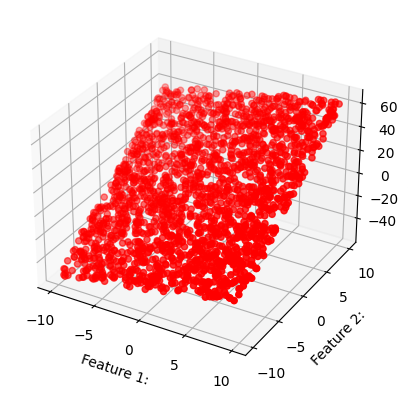

In [5]:
# INSERT CODE TO PLOT IN 3D (XYZ) IF x.shape[1]=2 (otherwise do nothing)
if x.shape[1] == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], y, c='r')
    ax.set_xlabel('Feature 1: ')
    ax.set_ylabel('Feature 2: ')
    ax.set_zlabel('Response')
    plt.show()

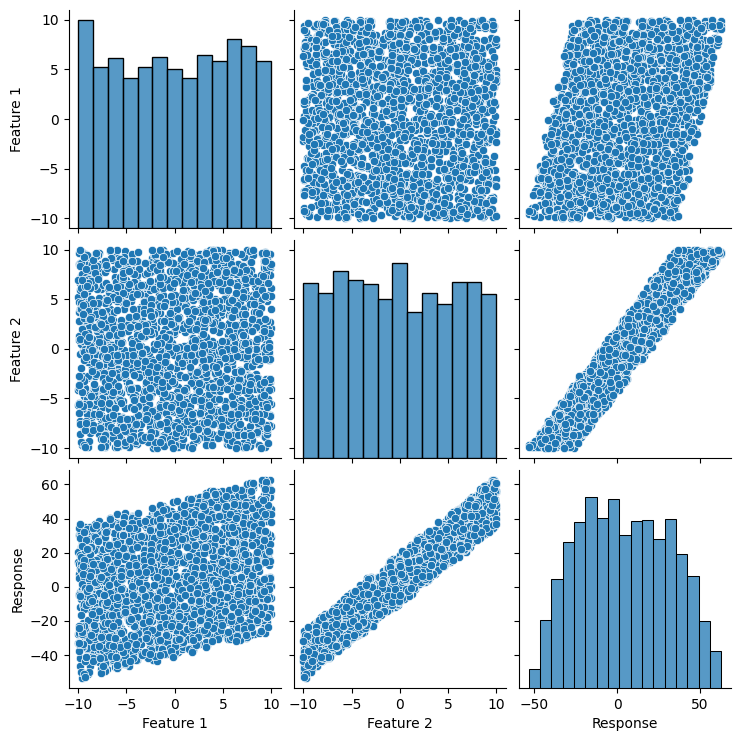

In [6]:
## INSERT CODE TO DO A PAIR-CORRLATION PLOT WITH SEABORN FOR THE X and Y DATA
data = np.concatenate((x, y), axis=1)
df = pd.DataFrame(data, columns=[f'Feature {i + 1}' for i in range(x.shape[1])] + ['Response'])
sns.pairplot(df)
plt.show()

### Define your model

In [7]:
# INSERT CODE THAT TAKES A MATRIX X, A VECTOR P, AND RETURNS EITHER A LINEAR OR LOGISTIC MODEL
# * it should work for linear regression and logistic regression
# * in both cases use p[0] as the bias term

def m(x,p):
    p=p.reshape(p.shape[0],1)
    #INSERT CODE
    z = np.dot(x, p[1:]) + p[0]
    if model_type == "linear":
      return z

    elif model_type == "logistic":
      return s(z)


### 2) Define a measure of success
* For our success measure, we will use the root mean square error.
  * This is arguably the most common regression objective function (i.e error metric).

In [8]:
#  * Write an objective function, called "loss", that returns the RMSE for the training set, given a parameterization vector p for a model (see below for more on the model)
#   * This can be done in one line with Numpy component wise operations or with a for loop to compute the sum

def loss(p):
    global x_train, y_train
    #INSERT CODE HERE
    preds = m(x_train, p)
    return np.sqrt(np.mean((preds - y_train) ** 2))


### 3) Define Evaluation protocol  
  
**ASSIGNMENT-3**
  * Split the data into an 80-20 training-validation set
  * Plot the training and validation data together (you can copy, tweak, and recycle your code from the plot above)

In [9]:
# INSERT CODE TO PARTITION DATA
split_idx = int(N*.8)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = x[:split_idx], x[split_idx:]

In [10]:
# INSERT CODE TO PRINT THE SHAPE OF THE TRAINING SET (SANITY CHECK)
# INSERT CODE TO PRINT THE SHAPE OF THE VALIDATION SET (SANITY CHECK)
print(f"Training set shape: {x_train.shape, y_train.shape}")
print(f"Test set shape: {x_test.shape, y_test.shape}")

Training set shape: ((1600, 2), (1600, 2))
Test set shape: ((400, 2), (400, 2))


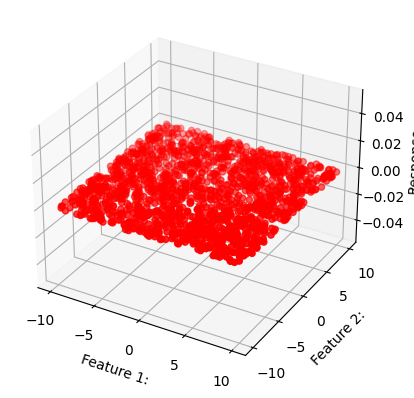

In [11]:
# INSERT CODE TO PLOT IN 3D BOTH THE THE TRAINING AND VALIDATION SET ONLY IF x.shape[1]=2 (otherwise do nothing)
if x_train.shape[1] == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_train[:, 0], x_train[:, 1], c='r')
    ax.set_xlabel('Feature 1: ')
    ax.set_ylabel('Feature 2: ')
    ax.set_zlabel('Response')
    plt.show()


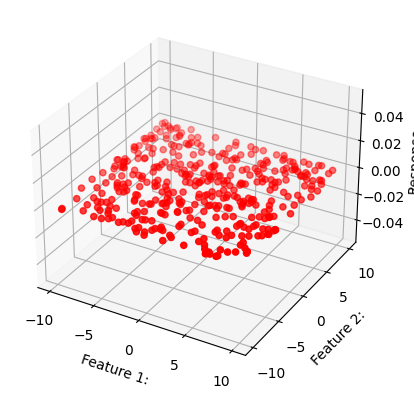

In [12]:
if x_test.shape[1] == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_test[:, 0], x_test[:, 1], c='r')
    ax.set_xlabel('Feature 1: ')
    ax.set_ylabel('Feature 2: ')
    ax.set_zlabel('Response')
    plt.show()

### 4) Prepare the data

**ASSIGNMENT-4**

* Normalize the x data using x --> (x-u_x)/sigma_x
* Normalize the y data using y --> (y-u_y)/sigma_y
* The quantities u_x, u_y, sigma_x and sigma_y should be stored as variables and computed from the training set
* Re-plot the data, notice how numbers on the axis are dramatically different and range roughly -2 to 2.
* You don't need to include units since the data has no units after normalization

In [13]:
# INSERT CODE TO COMPUTE THE MEAN DOWN THE COLUMNS OF X AND Y

u_x = np.mean(x_train, axis=0)
sigma_x = np.std(x_train, axis=0)
if model_type == "linear":
    u_y = np.mean(y_train)
    sigma_y = np.std(y_train)
else:
    u_y = 0
    sigma_y = 1

In [14]:
# INSERT CODE TO PRINT THE MEAN, STD, AND THE SHAPES (SANITY CHECK)

print("Mean of X:", u_x)
print("Standard Deviation of X:", sigma_x)
print("Mean of Y:", u_y)
print("Standard Deviation of Y:", sigma_y)
print("Shapes:", x_train.shape, y_train.shape)


Mean of X: [ 1.42505078e-04 -1.72507897e-01]
Standard Deviation of X: [5.90721871 5.78719134]
Mean of Y: -0.0861826961391
Standard Deviation of Y: 5.84815015964323
Shapes: (1600, 2) (1600, 2)


In [15]:
import numpy as np
def f(x):
    return 2.71*x[:,0]**2+3.14*x[:,1]+1*x[:,2]+2

#x=np.array([1,2,3])
x=np.array([[1,2,3],[1,1,1]])
print(x)
print(f(x))



[[1 2 3]
 [1 1 1]]
[13.99  8.85]


In [16]:
#INSERT CODE TO NORMALIZE THE COLUMNS OF THE DATA SET USING THESE QUANTITIES
# note: add an if statement to only normalize y values if model_type="linear", i.e. don't normalize logistic y data

x_train = (x_train - u_x) / sigma_x

x_val = (x_test - u_x) / sigma_x

if model_type == "linear":
    y_train = (y_train - u_y) / sigma_y
    y_val = (y_test - u_y) / sigma_y


#TRAINING - above


#VALIDATION - above



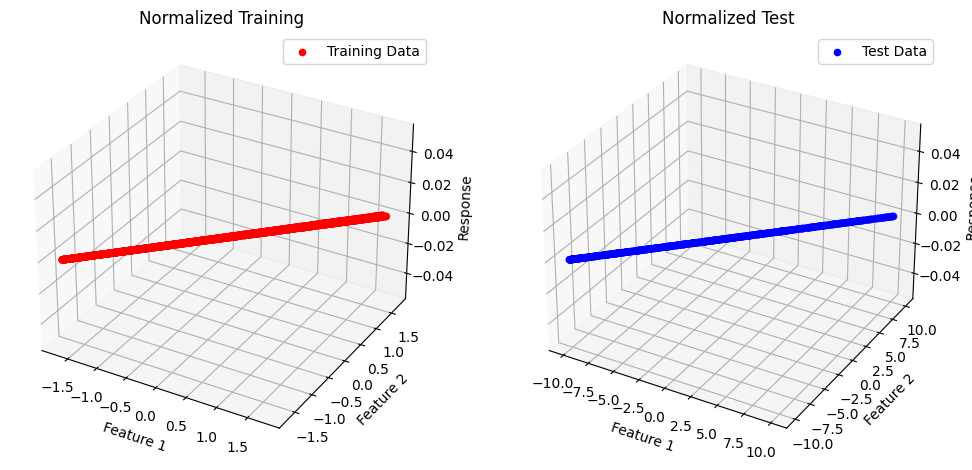

In [17]:
# INSERT CODE TO PLOT IN 3D BOTH THE THE TRAINING AND VALIDATION SET ONLY IF x.shape[1]=2 (otherwise do nothing)
# NOTICE HOW THE UNITS CHANGES

if x_train.shape[1] == 2:
    fig = plt.figure(figsize=(12, 6))

    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x_train, y_train, color='r', label='Training Data')
    ax.set_title("Normalized Training")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Response")
    ax.legend()

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x_test, y_test, color='b', label='Test Data')
    ax.set_title("Normalized Test")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Response")
    ax.legend()

    plt.show()


### 5) Train your model

**ASSIGNMENT-6**

* Choose an initial guess for the parameter vector p
  * If you randomly generate the initial guess, you may have to run the optimization algorithm several times before getting a good fit
  * Remember that "bad fits", correspond to bad choices for the fitting parameters, these occur when the optimizer gets "stuck" in a bad local minima in the parameter space.
  * Optionally, you can ensure a "good fit" every time, by looking at the normalized plot and the functional form of the model and manually choosing fitting parameters that "make sense".
* Use the Scipy minimizer from Part-1 to minimize the loss function, by varying the components of the parameter vector p, to find the best fit for the model
* Make predictions with the fitted model for the test and validation data
* plot the predictions in the normalized space
* un-normalize the data so that it has units again
* Plot the results in the un-normalized space

In [18]:
# INSERT CODE TO CHOOSE A RANDOM INITIAL GUESS (INFER THE LENGTH FROM X DATA SHAPE)

guess = np.random.rand(x_train.shape[1] + 1)

# INSERT CODE TO TRAIN YOUR MODEL
# EITHER USING scipy MIMIMIZER OR YOUR OWN GRADIENT DESENT CODE FROM HW-2

output = minimize(loss, guess, method='BFGS')
optimized = output.x

# # PREDICTION
y_train_pred = m(x_train, optimized)
y_test_pred = m(x_val, optimized)


In [19]:
#had a dimension error
print(f"y train: {y_train.shape}, y pred: {y_train_pred.shape}")

y train: (1600, 2), y pred: (1600, 1)


In [25]:
## INSERT CODE TO PRINT THE SHAPE (SANITY CHECK)
print(f"Shape of Training Predictions: {y_train_pred.shape}")
print(f"Shape of Test Predictions: {y_test_pred.shape}")

Shape of Training Predictions: (1600, 1)
Shape of Test Predictions: (400, 1)


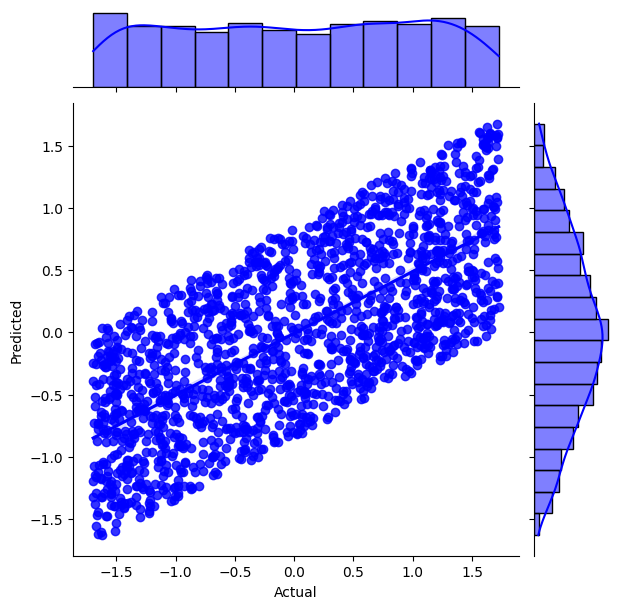

In [23]:
## INSERT CODE TO CREATE TWO PAIRY PLOTS (y_pred vs y_data), ONE FOR TRAINING AND ONE FOR TEST
y_train = y_train[:, 0].reshape(-1, 1)

sns.jointplot(x=y_train.ravel(), y=y_train_pred.ravel(), kind='reg', color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [26]:
#had a dimension error
print(f"y train: {y_test.shape}, y pred: {y_test_pred.shape}")

y train: (400, 1), y pred: (400, 1)


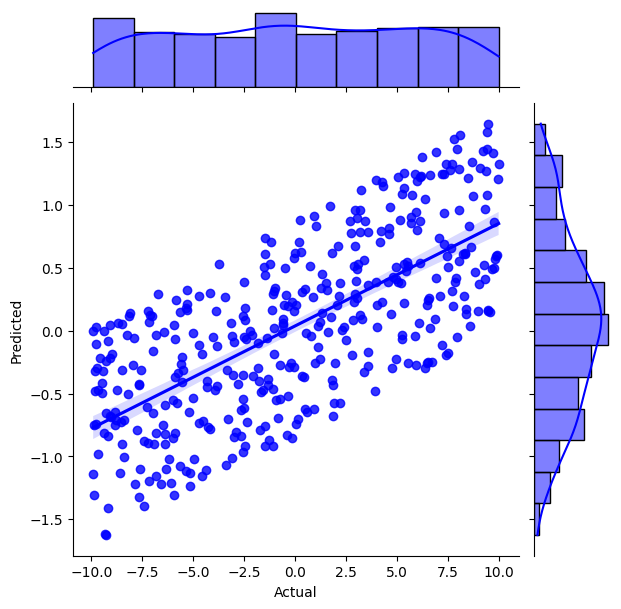

In [27]:
sns.jointplot(x=y_test.ravel(), y=y_test_pred.ravel(), kind='reg', color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [37]:
if model_type == "linear":
    y_train_pred_unnorm = y_train_pred * sigma_y + u_y
    y_val_pred_unnorm = y_test_pred * sigma_y + u_y
    y_train_unnorm = y_train * sigma_y + u_y
    y_val_unnorm = y_test * sigma_y + u_y

else:
    y_train_pred_unnorm = y_train_pred
    y_val_pred_unnorm = y_test_pred
    y_train_unnorm = y_train
    y_val_unnorm = y_test

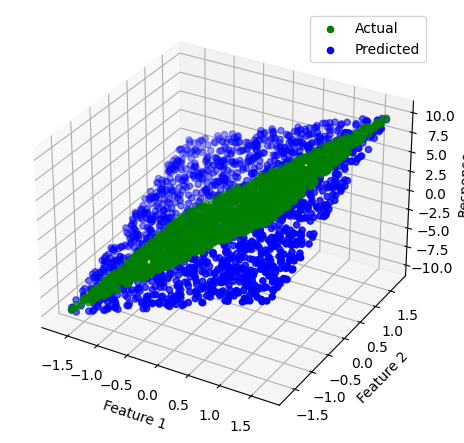

In [38]:
# INSERT CODE TO PLOT IN 3D BOTH THE THE XYZ FOR TRAINING-SET AND PREDICTIONS ONLY IF x.shape[1]=2 (otherwise do nothing)
# NOTICE HOW THE UNITS CHANGES

if x_train.shape[1] == 2:
    fig = plt.figure(figsize=(12, 6))

    # Training set and predictions plot
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x_train[:, 0], x_train[:, 1], y_train_unnorm, color='g', label='Actual')
    ax.scatter(x_train[:, 0], x_train[:, 1], y_train_pred_unnorm, color='b', label='Predicted')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Response")
    ax.legend()


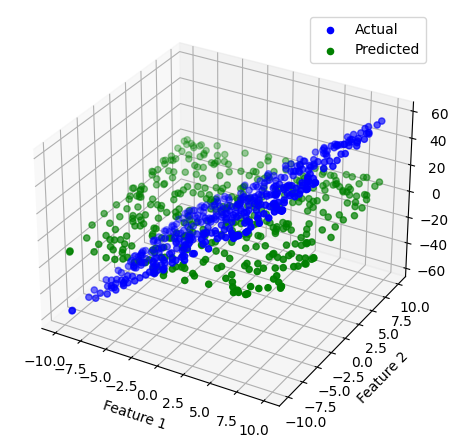

In [39]:
if x_train.shape[1] == 2:
    fig = plt.figure(figsize=(12, 6))

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x_test[:, 0], x_test[:, 1], y_val_unnorm, color='b', label='Actual')
    ax.scatter(x_test[:, 0], x_test[:, 1], y_val_pred_unnorm, color='g', label='Predicted')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Response")
    ax.legend()

    plt.show()